# Assignment #6: Data Cleaning with Python Pandas
Hello everyone, welcome to the "Python & pandas" assignment!

In this notebook, you will do the following:
* Section 0: Load a dataset and get an overview
* Section 1: Prepare a dataset using general operations
* Section 2: Detect outliers
* Section 3: Detect and remove errors (datetime and text strings)
* Section 4: Deal with missing values
* Section 5: Discovery of integrity constraint violations using pandas 

**External reference that might be useful**:
- Mini-Tutorial: [10 minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)


<span style="color:red">**<big>NOTE**: </span>
    
- <span style="color:red"><big>You should remove the quotes ("YOUR CODE HERE") when working with the code. </span>
    
- <span style="color:red"><big>Please execute the notebook cells IN ORDER and DO NOT SKIP STEPS </span>


    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### Section 0: Load the Dataset 
**Dataset Description**:
The original dataset is derived from New York City Airbnb Open Data [source](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data). 

**Context**:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**:
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**Acknowledgements**:
This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

In [2]:
# Load a CSV file as a data frame (df) using pandas
# Parameters: filepath_or_buffer; use separator: default "," 
df = pd.read_csv('NYC-Airbnb-Visible-Dirty.csv', sep=',')

In [3]:
# Use the head() function to see the table schema and the first 5 rows:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattann,Harlem,40.80902,-73.94190,Private room,150,3,,NaN,NaN,1,365
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/17,0.40,1,0
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Mannhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/19,3.47,1,220
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Mannhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2/30/2017,0.99,1,0


In [4]:
# Hey, look: This is how you call on a specific column room_type in a dataframe!" 
# Note how you also learn how many rows there are ..
df['room_type']

0        Private room
1        Private room
2        Private room
3        Private room
4        Private room
             ...     
22321    Private room
22322    Private room
22323    Private room
22324    Private room
22325    Private room
Name: room_type, Length: 22326, dtype: object

In [5]:
# value_counts(): Return a Series containing counts of unique values. 
# value_counts(): https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# This function is somewhat similar to "Text Facet" in OpenRefine
df['neighbourhood'].value_counts()

Bedford-Stuyvesant    2038
                      1996
Bushwick              1719
Harlem                1573
Crown Heights          780
                      ... 
Prince's Bay             1
Midland Beach            1
Eltingville              1
Arden Heights            1
West Farms               1
Name: neighbourhood, Length: 210, dtype: int64

### Section 1: Prepare Data with General Operations 
In this section, we will learn how to use Python functions to: 
1. trim leading and trailing whitespaces 
2. perform uppercase/lowercase conversions

These general operations can be used to transform the data into a more consistent, canonical representation, in preparation for the actual process of deduplication; cf. *Koumarelas, I., Jiang, L., & Naumann, F. (2020), Data Preparation for Duplicate Detection.*




**1.1 Trim Leading and Trailing Whitespaces with function strip() : [Documentation](https://pandas.pydata.org/pandas-docs/version/1.2.4/reference/api/pandas.Series.str.strip.html)**

 ###### **[6 points] Question 1:** 
Create two new columns `name_trim` and `host_name_trim` by trimming leading and trailing whitespaces on column `name`, and `host_name`, respectively. Hint: use `strip()` from `str`. 

In [6]:
def q1(df):
    df['name_trim'] = df["name"].str.strip()
    df['host_name_trim'] = df["host_name"].str.strip()

In [7]:
# Self-Testing Time [no points assigned]: 
# This works as an instant feedback to check if the function q1() performs well
# Create a new dataframe df_trim_test with four columns: `name_trim`, `name`, `host_name_trim`, and `host_name`
q1(df)
df_trim_test = df[
                 ['name_trim', 'name', 'host_name_trim', 'host_name']
    ]
df_trim_test.head()

,name_trim,name,host_name_trim,host_name
0,Clean & quiet apt home by the park,Clean & quiet apt home by the park,John,John
1,THE VILLAGE OF HARLEM....NEW YORK !,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Elisabeth
2,BlissArtsSpace!,BlissArtsSpace!,Garon,Garon
3,Large Furnished Room Near B'way,Large Furnished Room Near B'way,Shunichi,Shunichi
4,Cozy Clean Guest Room - Family Apt,Cozy Clean Guest Room - Family Apt,MaryEllen,MaryEllen


In [8]:
# [2 points] Visible Test 
q1(df)
if list(df['name_trim']) == list(pd.read_csv("expected_output/q1.csv")["name_trim"]):
    print('name_trim: test passed.')
else:
    raise ValueError('name_trim: test failed.')

if list(df['host_name_trim']) == list(pd.read_csv("expected_output/q1.csv")["host_name_trim"]):
    print("host_name_trim: test passed.")
else:
    raise ValueError("host_name_trim: test failed.")

name_trim: test passed.
host_name_trim: test passed.


In [9]:
# [4 points] Hidden test for q1 

**1.2  Uppercase values with function upper(): [Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html).**

Data quality issues analysis: The values in column `name` vary in their format, i.e. some values are uppercase only, some are lowercase only, some values are mixed uppercase and lowercase.

 ###### **[2 points] Question 2:** 
 Create a new column `name_upper` by applying function `upper()` on column `name_trim`

In [10]:
def q2(df):
    df['name_upper'] = df["name_trim"].str.upper()

In [11]:
# Self-Testing Time [no points assigned]: 
# This works as an instant feedback to check if the function q2() performs well
# Create a new dataframe df_upper_test with two columns: `name_trim` and `name_upper`
q2(df)
df_upper_test = df[
                 ['name_trim', 'name_upper']
    ]
df_upper_test.head()

,name_trim,name_upper
0,Clean & quiet apt home by the park,CLEAN & QUIET APT HOME BY THE PARK
1,THE VILLAGE OF HARLEM....NEW YORK !,THE VILLAGE OF HARLEM....NEW YORK !
2,BlissArtsSpace!,BLISSARTSSPACE!
3,Large Furnished Room Near B'way,LARGE FURNISHED ROOM NEAR B'WAY
4,Cozy Clean Guest Room - Family Apt,COZY CLEAN GUEST ROOM - FAMILY APT


In [12]:
# [2 points] Visible Test
q2(df)
if list(df['name_upper']) == list(pd.read_csv("expected_output/q2.csv")["name_upper"]):
    print('name_upper: passed.')
else:
    raise ValueError('name_upper: failed.')

name_upper: passed.


### Section 2: Outlier Detection
- Let's first look at the data distribution of the values in column `price`.
- We can see that approximately 99% of the values are below 162.5 (run the cells below and see how we compute 162.5). There are few data points that are very high and can be considered an outliers. Most machine learning models are heavily impacted by outliers, hence we often need to identify and deal with such outliers.
- The following figure should help you understand outliers. It compares a normal distribution with a boxplot. A boxplot considers a point an outlier if it falls outside of the 1.5*interquantile range.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png" style="width:30%">

image source: wikipedia

In [13]:
df.price.describe()

count    22326.000000
mean        89.780973
std        160.205262
min          0.000000
25%         50.000000
50%         70.000000
75%         95.000000
max      10000.000000
Name: price, dtype: float64

In [14]:
# Just for your info: calculating Q3 + 1.5 x IQR
95+1.5*(95-50)

162.5

**Explanation:**
Values above 162.5 are considered outliers. Below 162.5, we have approximately 24.65*2+50 = 99.3 % of data. ([external reference](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/))

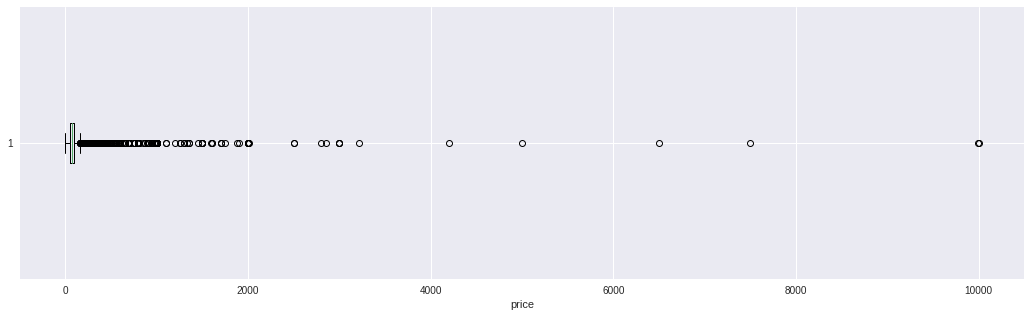

In [15]:
# Below is the boxplot for the price column. It's a fairly slim box and we see that there are many outliers here!
plt.figure(figsize=[18,5])
plt.boxplot(df.price, vert=False)
plt.xlabel('price')
plt.show()

#### 2.1 Winsorize - clipping extreme values
- As you probably know, means, standard deviations, correlations, mean squared errors and other statistics and models based on these are highly sensitive to outliers.
- One way of dealing with outliers is by using winsorization. This simply means capping data values at certain thresholds, based on the distribution of data. <span style="color:red">**The function `winsorize()` from Scipy: [Reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html)**</span>
- Here you can learn more about this technique: https://en.wikipedia.org/wiki/Winsorizing
- Below is an example quoated from the wikipedia page.


In [16]:
# Source: https://en.wikipedia.org/wiki/Winsorizing
# The code below performs 90% winsorization on the data contained in the python list.
# Observe that large values such as 1053, were replaced with 101, and -40 was replaced to -5.
from scipy.stats.mstats import winsorize
winsorize([92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41], limits=[0.05, 0.05])

masked_array(data=[ 92,  19, 101,  58, 101,  91,  26,  78,  10,  13,  -5,
                   101,  86,  85,  15,  89,  89,  28,  -5,  41],
             mask=False,
       fill_value=999999)

 ###### **[10 points] Question 3:** 

Winsorize column `price` with 99% winsorization.

**Hints:**
- Use the `winsorize()` function from above ([reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html)).

- The example given above was a 90% winsorization. You need to tweak the paratermer `limits` with 99% winsorization instead.

In [17]:
def q3(df):
    df['price_winsorized'] = winsorize(df["price"], limits = [0.005, 0.005])

In [18]:
# [2 points] Visible Test
q3(df)
if list(df['price_winsorized']) == list(pd.read_csv("expected_output/q3_a.csv")["price_winsorized"]):
    print('price_winsorized: test passed')
else:
    raise ValueError('price_winsorized: test failed')

price_winsorized: test passed


In [19]:
# [8 points] Hidden test for q3 

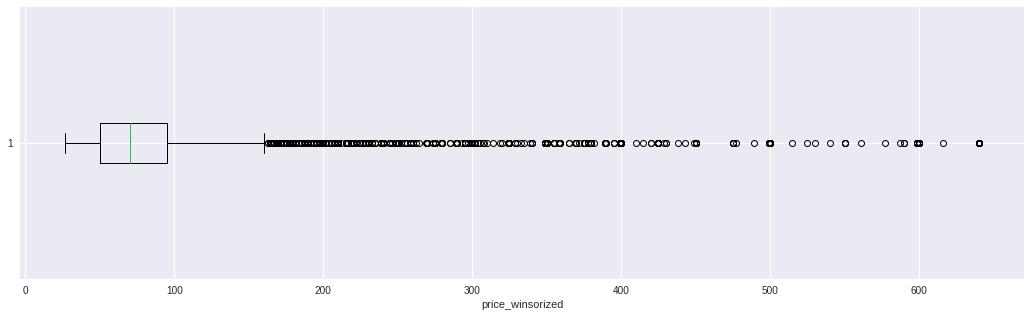

In [20]:
# Visualizing the new column price after 99% winsorization
plt.figure(figsize=[18,5])
plt.boxplot(df.price_winsorized, vert=False)
plt.xlabel('price_winsorized')
plt.show()

#### 2.2 Removing outliers
- Let's visualize column `minimum_nights`
- This time, we simply want to drop items that seem extreme. So, lets drop items that are greater or equal to 400.

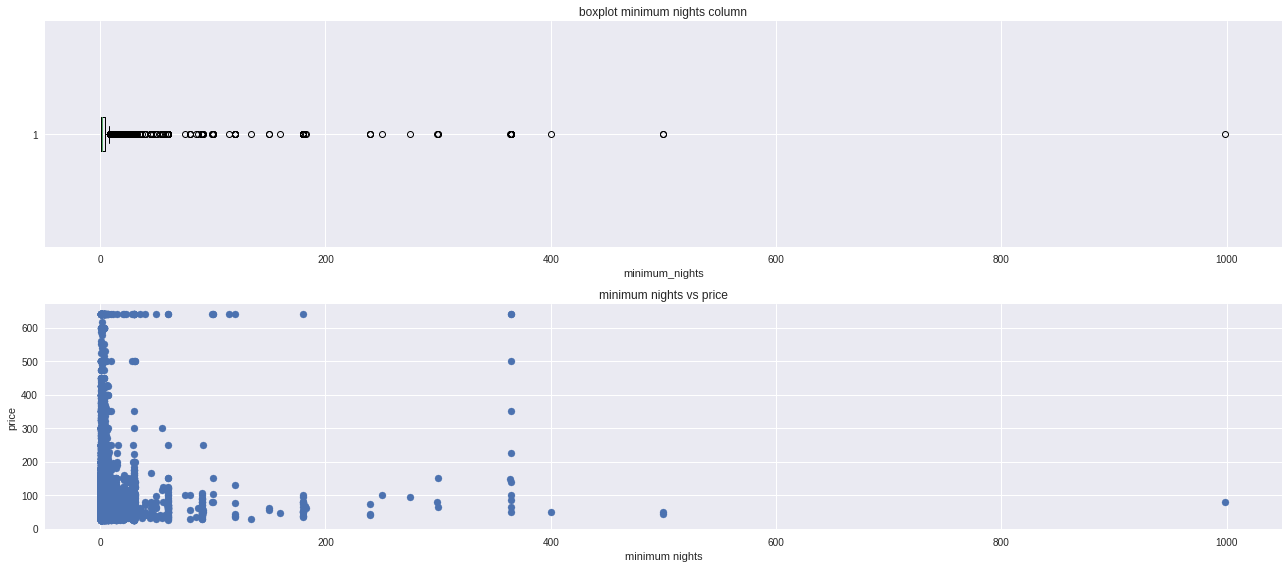

In [21]:
# Visualize the new price column
# We can observe that most of the data lies below 400
plt.figure(figsize=[18,8])
plt.subplot(211)
plt.boxplot(df.minimum_nights, vert=False)
plt.xlabel('minimum_nights')
plt.title('boxplot minimum nights column')

plt.subplot(212)
plt.scatter(df.minimum_nights, df.price_winsorized)
plt.xlabel('minimum nights')
plt.ylabel('price')
plt.title('minimum nights vs price')
plt.tight_layout()
# plt.show()

**Note:** Suppose we investigated data points with minimum nights above 400 and found that these observations do not have the correct price mentioned and hence do not follow the trend. We may then decide to drop these points, considering them as outliers.

 ###### **[10 points] Question 4:** 

Create a new data frame `df_wt_outliers` by dropping observations whose values in column `minimum_nights` are greater  or equal to 400.

**Hint**: Article for [reference](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [22]:
def q4(df):
    df_wt_outliers = df[df["minimum_nights"] < 400]
    
    return df_wt_outliers

In [23]:
# [2 points] Visible Test
df_wt_outliers = q4(df)
if list(df_wt_outliers['minimum_nights']) == list(pd.read_csv("expected_output/q4.csv")["minimum_nights"]):
    print('minimum_nights: test passed.')
else:
    raise ValueError('minimum_nights: test failed.')

minimum_nights: test passed.


In [24]:
# [8 points] Hidden test for q4

### Section 3:  Detect and remove errors (datetime and text strings)

In the following, we will go over Python methods for handling two types of errors in the Airbnb dataset:
1.   Handling Datetime errors

2.   Handling Typos


#### 3.1 Handling Datetime errors

#### **Data type**

Let's first check the data types of the current dataset. ```DataFrame.info()``` method prints a concise summary of the dataframe, including column names, Non-Null value count and data types. 
Here is a sample list of data types, supported by Pandas:


*   float             float64
*   int                  int64
*   datetime    datetime64[ns]
*   string              object

Note: Pandas stores the column with mixed data types as 'object' by default. Reference: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22326 non-null  int64  
 1   name                            22318 non-null  object 
 2   host_id                         22326 non-null  int64  
 3   host_name                       22314 non-null  object 
 4   neighbourhood_group             22326 non-null  object 
 5   neighbourhood                   22325 non-null  object 
 6   latitude                        22326 non-null  float64
 7   longitude                       22326 non-null  float64
 8   room_type                       22326 non-null  object 
 9   price                           22326 non-null  int64  
 10  minimum_nights                  22326 non-null  int64  
 11  number_of_reviews               22326 non-null  object 
 12  last_review                     

##### **Datetime**
> Data cleaning often includes steps to convert data into different formats, so it can be used for various analysis purposes.

Reviewing the output above, we find that the data type of column `last_review` is `object`. However, column `last_review` indicates the **date** when an Airbnb listing received lastest review. Therefore, we want to convert the column `last_review` to a datetime type and check if it contains any issues. (Reference: [Docs](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html))

> We will use the ```.to_datetime(arg, format='%m/%d/%y', errors='coerce')``` function in pandas to convert the column `last_review` to a standard datetime format.
- **arg**: denotes the input column to be converted
- **format**: identifies and limits the default format in the raw data. In the airbnb dataset, we can find the string in the 'last_review' column, e.g. "10/19/18" is in the "%m/%d/%y" format
- **errors='coerce'**: turns any strings that violates the **format** into Null value.

In [26]:
df['last_review']

0         10/19/18
1              NaN
2          10/5/17
3          6/24/19
4        2/30/2017
           ...    
22321          NaN
22322          NaN
22323          NaN
22324          NaN
22325          NaN
Name: last_review, Length: 22326, dtype: object

###### Step 1: Convert the data type of column `last_review`  to datetime

 ###### **[6 points] Question 5:** 

Convert column `last_review` to datetime format, replace dates that are not in `'%m/%d/%y'` format as null (NaT), and save it as `new_last_review`.

In [27]:
def q5(df):
    df['new_last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%y', errors='coerce')

In [28]:
# [2 points] Visible Test
q5(df)
if list(df['new_last_review']) == list(pd.to_datetime(pd.read_csv("expected_output/q5.csv")["new_last_review"])):
    print('new_last_review: test passed.')
else:
    raise ValueError('new_last_review: test failed.')

new_last_review: test passed.


In [29]:
# [4 points] Hidden test for q5


In [30]:
# return the column `new_last_review'
df['new_last_review']

0       2018-10-19
1              NaT
2       2017-10-05
3       2019-06-24
4              NaT
           ...    
22321          NaT
22322          NaT
22323          NaT
22324          NaT
22325          NaT
Name: new_last_review, Length: 22326, dtype: datetime64[ns]

In [31]:
# Return the dates that cannot be parsed by the defined format '%m/%d/%y' 
# and have been converted to NaT,
# e.g. the month is out of the range of [1,12].
df['last_review'][~df.last_review.isna() & df['new_last_review'].isna()]

4         2/30/2017
17       13/15/2019
18093       6/31/19
18094       6/31/19
18099       2/30/19
Name: last_review, dtype: object

###### Step 2: Extract year, month, day from new_last_review Series

In [32]:
df["year"] = df['new_last_review'].dt.year
df["month"] = df['new_last_review'].dt.month
df["day"] = df['new_last_review'].dt.day

df[["last_review","year","month","day"]].head(5)

,last_review,year,month,day
0,10/19/18,2018.0,10.0,19.0
1,NaN,NaN,NaN,NaN
2,10/5/17,2017.0,10.0,5.0
3,6/24/19,2019.0,6.0,24.0
4,2/30/2017,NaN,NaN,NaN


###### Step 3: Convert ```new_last_review``` to ISO format **string**.

In [33]:
df['new_last_review'].dt.strftime('%Y-%m-%d')

0        2018-10-19
1               NaN
2        2017-10-05
3        2019-06-24
4               NaN
            ...    
22321           NaN
22322           NaN
22323           NaN
22324           NaN
22325           NaN
Name: new_last_review, Length: 22326, dtype: object

##### **Handling typos** [pandas.DataFrame.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

> **Checking unique values for categories**
> ```DataFrame.value_counts()``` returns for each unique value the count of that value.
<br>
> Reference: [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [34]:
# Applying value_counts() on column `neighbourhood_group`, you find it contains typos, e.g., "Manhattann" and "Brooklyyn". 
df['neighbourhood_group'].value_counts()

Brooklyn         10037
Mannhattan        7949
Queens            3372
Bronx              652
Staten Island      188
Brooklyyn           95
Manhattann          33
Name: neighbourhood_group, dtype: int64

 ###### **[8 points] Question 6:**   

Use ```DataFrame.replace()``` to correct "Mannhattan" and "Manhattann" to "Manhattan", and "Brooklyyn" to "Brooklyn", respectively. Save the new values in a new column `neighbourhood_group_new`. See also [pandas.DataFrame.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [44]:
def q6(df):
    
    typos_dict = {
        "Mannhattan": "Manhattan",
        "Manhattann": "Manhattan",
        "Brooklyyn": "Brooklyn"
    }

    df['neighbourhood_group_new'] = df["neighbourhood_group"].replace(typos_dict)

In [45]:
# [2 points] Visible Test
q6(df)
if list(df['neighbourhood_group_new'].value_counts().values) == list(pd.read_csv("expected_output/q6.csv")['neighbourhood_group_new'].value_counts().values):
    print('neighbourhood_group_new: test passed.')
else:
    raise ValueError('neighbourhood_group_new: test failed.')

neighbourhood_group_new: test passed.


In [46]:
# return the unique values after correcting the misspellings
df['neighbourhood_group_new'].value_counts()

Brooklyn         10132
Manhattan         7982
Queens            3372
Bronx              652
Staten Island      188
Name: neighbourhood_group_new, dtype: int64

In [47]:
# [6 points] Hidden test for q6


### Section 4: Dealing with missing values

In this section, you will learn about detecting missing values (and the difference between NA and NULL), different types of missing values, and simple methods to deal with missing values.

#### 4.1 Missing Values Detection

Goal: learn how to use pandas to detect missing values in columns.

In [48]:
# Replace the empty string with NAN that can be recognized by pandas
# Only apply on columns number_of_reviews and neighbourhood
df['number_of_reviews'] = df['number_of_reviews'].replace(r'^\s+$',np.nan, regex=True)
df['neighbourhood'] = df['neighbourhood'].replace(r'^\s+$',np.nan, regex=True)

In [49]:
# Return all columns that have missing values
columns_with_mv = df.columns[df.isnull().any()]
columns_with_mv

Index(['name', 'host_name', 'neighbourhood', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'name_trim', 'host_name_trim',
       'name_upper', 'new_last_review', 'year', 'month', 'day'],
      dtype='object')

In [50]:
# Output the number of missing values of each column
# df[columns_with_mv].isna().sum() also works
df[columns_with_mv].isnull().sum()

name                    8
host_name              12
neighbourhood        1997
number_of_reviews    4661
last_review          4661
reviews_per_month    4661
name_trim               8
host_name_trim         12
name_upper              8
new_last_review      4666
year                 4666
month                4666
day                  4666
dtype: int64

###### **[8 points] Question 7:** 
Calculate the percentage of missing values on the columns `neighbourhood` and `number_of_reviews`.

In [60]:
def q7(df):
    total_rows = len(df)
    neighbourhood_missing_ptg = (df["neighbourhood"].isnull().mean()) # * 100
    number_reviews_missing_ptg = (df["number_of_reviews"].isnull().mean()) # * 100
    
    return neighbourhood_missing_ptg, number_reviews_missing_ptg

In [61]:
# [2 points] Visible Test for q7
neighbourhood_missing_ptg, number_reviews_missing_ptg = q7(df)
if round(neighbourhood_missing_ptg,2) == 0.09:
    print('neighbourhood_missing_ptg: test passed.')
else:
    raise ValueError('neighbourhood_missing_ptg: test failed.')
if round(number_reviews_missing_ptg,2) == 0.21:
    print('number_reviews_missing_ptg: test passed.')
else:
    raise ValueError('number_reviews_missing_ptg: test failed.')

neighbourhood_missing_ptg: test passed.
number_reviews_missing_ptg: test passed.


In [62]:
# [6 points] Hidden test for q7

#### 4.2  Potential Solution: Impute missing values with the mean value. 

###### **[10 points] Question 8:** 
Create a new column `no_reviews_wt_missing` by imputing the missing values on column `number_of_reviews` with the mean value. 
See also [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

> **Hints**: Convert the data values in column `number_of_reviews` to `float` by using [.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) (or exploring other potential solutions) and then compute the mean values. Fill out the missing values with the mean value. The reason that we do not convert the `number_of_reviews` column values to `int` type is because they contain `np.nan` which can not be cast from type `float` to `int`.

In [64]:
def q8(df):
    
    df["number_of_reviews"] = df["number_of_reviews"].astype(float)
    mean_reviews = df["number_of_reviews"].mean()
    
    df['no_reviews_wt_missing'] = df["number_of_reviews"].fillna(mean_reviews)
    
    return df    

In [65]:
# [2 points] Visible Test
q8(df)
if len(df['no_reviews_wt_missing'].dropna()) != 22326:
    raise ValueError('no_reviews_wt_missing: test failed.')
else:
    if df['no_reviews_wt_missing'].mean() - 30.47529 < 1e-3:
        print('no_reviews_wt_missing: test passed.')
    else:
        raise ValueError('no_reviews_wt_missing: test failed.')

no_reviews_wt_missing: test passed.


In [66]:
# [8 points]Hidden test for q8

### Section 5: Discovering Integrity Constraint Violations using pandas 

To discover additional data quality issues within this dataset, we consider three specific integrity constraints:
1. The primary key column `id` should be unique (no duplicates).
2. The column `availability_365` (the number of available days for booking within a year) should only contain values between 0 to 365.
3. The value of `host_id` should determine the value of `host_name`, i.e., there is a functional dependency FD: `host_id` &rarr; `host_name`.

Now we will detect rows that violate these ICs one by one.

###### **[10 points] Question 9:** 

The primary key column `id` should be unique (no duplicates). 

Please write a function that computes the duplicated rows as `ic1_violations` in DataFrame from the original table.

> **Expected output format**: A pandas DataFrame object containing all rows with duplicated `id`. 

> **Hint**: [Groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) the column `id` first to help check the duplicate rows. 

In [69]:
def q9(df):
    
    duplicate_ids = df.groupby("id").filter(lambda x: len(x) > 1)
    
    ic1_violations = duplicate_ids

    return ic1_violations

In [70]:
# [2 points] Visible Test for IC #1
# Please do not change the code below
ic1_violations = q9(df)

if type(ic1_violations) != pd.DataFrame:
    raise ValueError('ic1_violations: test failed.')
else:
    if len(ic1_violations) == 4:
        print('ic1_violations: test passed.')
    else:
        raise ValueError('ic1_violations: test failed.')

ic1_violations: test passed.


In [71]:
# [8 points] Hidden test for q9

###### **[10 points] Question 10:** 

The column `availability_365` (the number of available days for booking within a year) should only contain values between 0 to 365.

Write a function that extracts the violating rows as `ic2_violations` in DataFrame from the original table.

> **Expected output format**: A pandas DataFrame object containing all rows with `availability_365` outside the range of 0, ..., 365. 

In [72]:
def q10(df):
    ic2_violations = df[(df["availability_365"] < 0) | (df["availability_365"] > 365)]

    return ic2_violations 

In [73]:
# [2 points] Visible Test for IC #2
# Please do not change the code below
ic2_violations = q10(df)
if type(ic2_violations) != pd.DataFrame:
    raise ValueError('ic2_violations: test failed.')
else:
    if len(ic2_violations) == 61:
        print('ic2_violations: test passed.')
    else:
        raise ValueError('ic2_violations: test failed.')

ic2_violations: test passed.


In [74]:
# [8 points] Hidden test for q10

###### **[10 points] Question 11:** 

The value of `host_id` should determine the value of `host_name`, i.e., there is a functional dependency FD: `host_id` &rarr; `host_name`.

>**Expected output format**: Your output should be a `dict{}` with the format of: 
```
{(host_id, host_name): record_count}
```
where (`host_id`, `host_name`) tuples are all the existing combinations that exist as violations, the `count` values are the total count of records having the combination of (`host_id`, `host_name`). 

In [75]:
def q11(df):
    
    grouped = df.groupby(["host_id", "host_name"]).size().reset_index(name = "count")
    
    host_id_violations = df.groupby("host_id")["host_name"].nunique()
    host_id_violations = host_id_violations[host_id_violations > 1].index
    
    ic3_violations = {}
    
    for host_id in host_id_violations:
        violating_rows = grouped[grouped["host_id"] == host_id]
        
        for _, row in violating_rows.iterrows():
            ic3_violations[(row["host_id"], row["host_name"])] = row["count"]
    
    return ic3_violations

In [76]:
# [2 points] Visible Tests for IC #3
# Please do not change the code below
ic3_violations = q11(df)
if type(ic3_violations) != dict:
    raise ValueError('ic3_violations: test failed.')
else:
    if (len(ic3_violations) == 19) and (sum(ic3_violations.values()) == 25):
        print('ic3_violations: test passed.')
    else:
        raise ValueError('ic3_violations: test failed.')

ic3_violations: test passed.


In [77]:
# [8 points] Hidden test for q11

#### Database restructuring  [Separating Tables]
The dataset contains redundancies that can be avoided by breaking up a large table into separate tables, thus avoiding these redundancies (and associated update anomalies).

Here, for columns `host_id` and `host_name`, we have observed many duplicates that are describing the same host. Such (near) duplications can lead to inconsistencies, update anomalies, and wasted storage.

A common practice to address this issue is to restructure a large, non-normalized table into several smaller tables, based on known dependencies.  See https://en.wikipedia.org/wiki/Database_normalization for more on this topic.



###### **[10 points] Question 12:**  
Here you will need to separate the `host_id`, `host_name`, and `calculated_host_listings_count` columns 
from the main table into a new table: `df_host` describing information about hosts. 
<span style="color:red">DO NOT SORT THE RESULTING TABLE</span>.



>**Expected output format**: The new table: `df_host` in pandas DataFrame that should contain three columns: `host_id`, `host_name`, and `calculated_host_listings_count`. The new table **should not** contain any duplicates.

**Note**: For record combinations that violate IC for (host_id, host_name), we will keep the first occurrences from the original table.

In [97]:
def q12(df):

    df_host = df[["host_id", "host_name", "calculated_host_listings_count"]].copy()
    
    df_host = df_host.drop_duplicates(subset = ["host_id"], keep = "first").reset_index(drop=True)
    
    return df_host

In [98]:
# [2 points] Visible Tests
df_host = q12(df)
if (len(df_host) == 16710) and (df_host['calculated_host_listings_count'].astype(int).sum() == 24746):
    print('Test passed.')
else:
    raise ValueError('Test failed.')

Test passed.


In [95]:
# [8 points] Hidden test for q12